In [1]:
# unit test
import unittest

from PIL import Image, ImageDraw

import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import math

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

%load_ext autoreload
%autoreload 2

# own module
from dataset.concept import PosNegConceptDataset, ClusterConceptDataset

['../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']


In [2]:
class UnitTestLoss(unittest.TestCase):

    def test_item_labelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../../results/tmp/masks_info_label.csv"]
        concepts_path = "C:/Users/Prinzessin/projects/decentnet/data/tmp/concepts"
        
        p_aug = 1 # augmentation probability = 1, cause of 2 crop tansform, we need both versions to be different
        
        pncd = PosNegConceptDataset(mode="train", channels=3, index_col=0, image_size=500, csv_filenames=csv_filenames, ci_concept=0, concepts_path=concepts_path, p_aug=p_aug)
        
        print(pncd.__len__())
        
        item = pncd.__getitem__(index=100)
        
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(item["img"][0].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["img"][1].permute(1, 2, 0), cmap="gray")
        

        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])

A0004_322    False
A0004_200    False
A0001_186    False
A0001_9      False
A0001_310    False
             ...  
A0002_104     True
A0002_177     True
A0002_127     True
A0002_311     True
A0002_187     True
Name: lbl, Length: 230, dtype: bool
this concept: lbl_Scars
             lbl
A0004_322  False
A0004_200  False
A0001_186  False
A0001_9    False
A0001_310  False
230


.
----------------------------------------------------------------------
Ran 1 test in 0.482s

OK


item
{'img': [tensor([[[0.7793, 0.7724, 0.7655,  ..., 0.8483, 0.8069, 0.7793],
         [0.7724, 0.7724, 0.7586,  ..., 0.8552, 0.8138, 0.7793],
         [0.7655, 0.7586, 0.7655,  ..., 0.8552, 0.8207, 0.7862],
         ...,
         [0.8621, 0.8414, 0.8207,  ..., 0.8483, 0.8552, 0.8552],
         [0.8759, 0.8552, 0.8276,  ..., 0.8552, 0.8621, 0.8621],
         [0.8690, 0.8690, 0.8621,  ..., 0.8621, 0.8690, 0.8759]],

        [[0.1793, 0.1724, 0.1517,  ..., 0.1310, 0.1310, 0.1310],
         [0.1724, 0.1517, 0.1448,  ..., 0.1379, 0.1379, 0.1310],
         [0.1517, 0.1448, 0.1379,  ..., 0.1448, 0.1448, 0.1379],
         ...,
         [0.1517, 0.1379, 0.1172,  ..., 0.1517, 0.1517, 0.1448],
         [0.1517, 0.1379, 0.1172,  ..., 0.1517, 0.1448, 0.1379],
         [0.1379, 0.1448, 0.1448,  ..., 0.1448, 0.1448, 0.1448]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.00

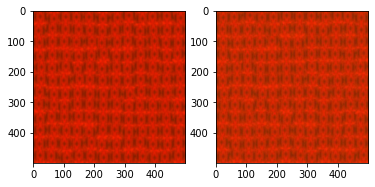

In [3]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)